# Problem Set 9

## Question 1 - Neural network horse race (10 points)
For this problem, you will test the predictive accuracy of three models on classifying wines into one of three possible cultivars.The data in the file strongdrink.txt. You used these data in PS7, exercise 1. The data are comprised of 176 observations, each of which is a chemical analysis of an Italian wine. Each wine is from one of three known cultivars (a cultivar is a group of grapes selected for desirable characteristics that can be maintained by propagation). The chemical analysis determined the quantities of the following 13 different constituents (the last 13 variables)     

### a) 
Create a scatterplot of the data where the x-variable is alcohol (alco) and the y-variable is color intensity (color int). Make the dot of each of the three possible cultivar types a different color. Make sure your plot has a legend.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [5]:
drink = pd.read_csv('data/strongdrink.txt')
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


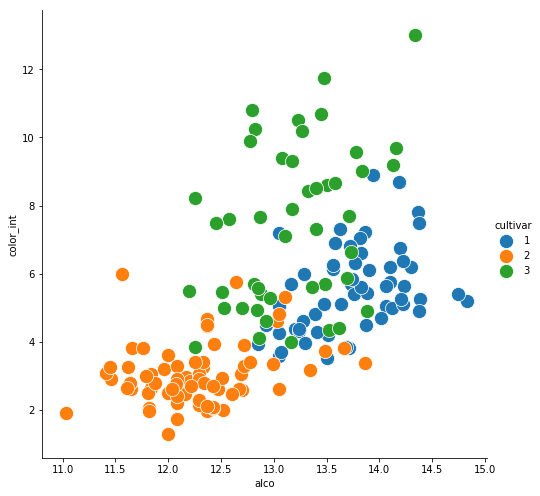

In [6]:
sns.pairplot(x_vars="alco", y_vars="color_int", data=drink, hue="cultivar", plot_kws ={'s': 200},size=7)

## b)
Use sklearn.linear model.LogisticRegression to fit a multinomial logistic model of cultivar on features alcohol (alco), malic acid (malic), total phenols (tot phen), and color intensity (color int) with the following linear predictor.

where $ηj = \beta_{j,0} + \beta_{j,0}alco_i + \beta_{j,2}malic_i + \beta_{j,3}tot phen_i + \beta_{j,4}colorint_i$

Use sklearn.model selection.RandomizedSearchCV to optimally tune
the hyperparameters penalty and C in the Logistic regression model. Set
n iter=200, n jobs=-1, cv=5 for k = 5 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. This last option will allow you
to compare the MSE of the optimized multinomial logit model (it will out-
put the negative MSE). Set your parameter distributions over which to
test random combinations to the following.

<br>
param_dist1 = {’penalty’: [’l1’, ’l2’] <br>
             ’C’: sp_uniform(0.1, 10.0)}<br>
             

Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.



### Answer

The optimal tuning parameters are a penalty of 11 and a C of 2.6659. <br>
The MSE of the model is 0.0739

In [37]:
drink['const']=1

x = drink[['const','alco','malic','tot_phen','color_int']].values
y = drink['cultivar'].values

In [38]:
#Create object
LogReg = LogisticRegression()
LogReg.fit(x,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
#Tune hyperparameters
param_log = {'penalty': ['l1', 'l2'],
             'C': sp_uniform(0.1, 10.0)}

log_tune = RandomizedSearchCV(LogReg, param_distributions=param_log,
                                    n_iter=200, n_jobs=-1, cv=5,
                                   random_state=25,scoring='neg_mean_squared_error')

log_tune.fit(x, y)
print('LogRegBestEstimator1=', log_tune.best_estimator_)
print('LogRegParams1=', log_tune.best_params_)
print('LogRegBestScore1=', -log_tune.best_score_)

LogRegBestEstimator1= LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
LogRegParams1= {'C': 2.665871587495725, 'penalty': 'l1'}
LogRegBestScore1= 0.11931818181818182


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [63]:
#Use optimal parameters
log_reg_opt = LogisticRegression(penalty='l1', C= 2.665871587495725)
log_reg_opt.fit(x,y)

y_pred_logreg = log_reg_opt.predict(x)
MSE_logreg = mean_squared_error(y, y_pred_logreg)
print('Log Reg MSE=', MSE_logreg)

Log Reg MSE= 0.07386363636363637


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## c) 
Use sklearn.ensemble.RandomForestClassifier to fit a random forest model of cultivar on the same four features used in part (b). Use sklearn.model selection.RandomizedSearchCV to optimally tune the hyperparameters in the random forest classification model. Tune the pa- rameters n estimators, max depth, min samples split, min samples leaf, and max features. Set n iter=200, n jobs=-1, cv=5 for k = 5 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. Set your Random Forest parameter distributions over which to test random combinations to the following. <br>

param_dist2 = {’n_estimators’: sp_randint(10, 200),<br>
             ’max_depth’: sp_rand_int(2, 4),<br>
             ’min_samples_split’: sp_randint(2, 20),<br>
             ’min_samples_leaf’: sp_randint(2, 20),<br>
             ’max_features’: sp_randint(1, 4)}<br>
             
Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

### Answer

The optimal tuning parameters are a max_depth of 3, max_features of 1, min_samples_leaf of 2, min_samples_split of 11, n_estimators of 10. <br>
The MSE for the random forest model is 0.1196

In [45]:
rf = RandomForestClassifier()
rf.fit(x,y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
#Tune hyperparameters
param_rf = {'n_estimators': [10,200],
                   'max_depth': sp_randint(2, 4),'min_samples_split': sp_randint(2, 20),
                   'min_samples_leaf': sp_randint(2, 20),'max_features':sp_randint(1,4)}

rf_tune = RandomizedSearchCV(rf, param_distributions=param_rf,
                             n_iter=200, n_jobs=-1, cv=5,random_state=25,
                             scoring='neg_mean_squared_error')

rf_tune.fit(x,y)
print('rf_tuneBestEstimator=', rf_tune.best_estimator_)
print('rf_tuneBestParams=', rf_tune.best_params_)
print('rf_tuneBestScore1=', -rf_tune.best_score_)

rf_tuneBestEstimator= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_tuneBestParams= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 10}
rf_tuneBestScore1= 0.125


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
#Run new Random Forest with optimal parameters

rf_opt = RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_split=11, min_samples_leaf=2,
                                     max_features=1, bootstrap=True,
                                     n_jobs=-1, oob_score=True, random_state=25)


rf_opt.fit(x,y)

y_testpred_rf = rf_opt.predict(x)
MSE_rf = mean_squared_error(y, y_testpred_rf)
print("Random Forest MSE - Random Forest",MSE_rf)

Random Forest MSE - Random Forest 0.11961489191720479


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


## d) 
Use sklearn.svm.SVC to fit a support vector machines classifier model of cultivar with a Gaussian radial basis function kernel kernel=’rbf’ on the four features used in parts (b) and (c). Use sklearn.modelselection.RandomizedSearchCV to optimally tune the hyperparameters in the support vector machines classifier model. Tune the parameters C penalty parameter, gamma kernel coefficient, and shrinking.
Set n iter=200, n jobs=-1, cv=5 for k = 5 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. Set your SVM parameter dis- tributions over which to test random combinations to the following.<br>

param_dist3 = {’C’: sp_uniform(loc=0.1, scale=10.0),<br>
             ’gamma’: [’scale’, ’auto’],<br>
             ’shrinking’: [True, False]}<br>

Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

### Answer
The optimal tuning parameters are: a regularization parameter (C) of 3.3605, a gamma that is scaled, and using shrinking.
The MSE for this model is 0.07955


In [56]:
svm_drink = svm.SVC()
svm_drink.fit(x,y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
#Tune hyperparameters
param_svm = {'C': sp_uniform(loc=0.1, scale=10.0),
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False]}

svm_tune = RandomizedSearchCV(svm_drink, param_distributions=param_svm,
                                    n_iter=200, n_jobs=-1, cv=5,
                                   random_state=25,scoring='neg_mean_squared_error')

svm_tune.fit(x,y)

print('TunedBestEstimator1=', svm_tune.best_estimator_)
print('TunedBestParams1=', svm_tune.best_params_)
print('TunedBestScore1=', -svm_tune.best_score_)

TunedBestEstimator1= SVC(C=3.3605112613782553, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
TunedBestParams1= {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
TunedBestScore1= 0.1534090909090909


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
#Run with optimal parameters

svm_opt = svm.SVC(kernel='rbf', gamma='scale', C=3.3605112613782553,shrinking=True)
svm_opt.fit(x,y)

y_testpred_svm = svm_opt.predict(x)
MSE_svm = mean_squared_error(y,y_testpred_svm)
print("SVM MSE",MSE_svm)

SVM MSE 0.07954545454545454


## e) 
Use sklearn.neural network.MLPClassifier to fit a multiple hidden layer neural network (multiple layer perceptron) model of cultivar. Use sklearn.model selection.RandomizedSearchCV to optimally tune the hyperparameters in the MLP classifier model. Tune the parameters hidden layer sizes, activation, and alpha. Set n iter=200, n jobs=-1, cv=5 for k = 5 k-fold
cross validation, random state=25, and scoring=’neg mean squared error’. Set your MLP parameter distributions over which to test random combi- nations to the following. <br>

param_dist4 = {’hidden_layer_sizes’: sp_randint(1, 100),<br>
             ’activation’: [’logistic’, ’relu’],<br>
             ’alpha’: sp_uniform(0.1, 10.0)}<br>

Report your optimal tuning parameter values (use the .best params ob- ject of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

### Answer
The optimal tuning parameters are: a hidden layer size of 93, the 'relu' activation function, and an alpha of 1.2079.
The MSE for this model is 0.0568

In [66]:
clf_mlp = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1)
clf_mlp.fit(x, y)

MLPClassifier(activation='tanh', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
#Tune hyperparameters
param_neural = {'hidden_layer_sizes': sp_randint(1, 100),
             'activation': ['logistic', 'relu'],
             'alpha': sp_uniform(0.1, 10.0)}

neural_tune = RandomizedSearchCV(clf_mlp, param_distributions=param_neural,
                                    n_iter=200, n_jobs=-1, cv=5,
                                   random_state=25,scoring='neg_mean_squared_error')

neural_tune.fit(x,y)

print('NeuralBestEstimator=', neural_tune.best_estimator_)
print('NeuralBestParams=', neural_tune.best_params_)
print('NeuralBestScore=', -neural_tune.best_score_)

NeuralBestEstimator= MLPClassifier(activation='relu', alpha=1.2079463985549488, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=93, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
NeuralBestParams= {'activation': 'relu', 'alpha': 1.2079463985549488, 'hidden_layer_sizes': 93}
NeuralBestScore= 0.07954545454545454


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [70]:
clf_mlp_opt = MLPClassifier(hidden_layer_sizes= 93, activation='relu', solver='lbfgs', alpha=1.2079463985549488)

clf_mlp_opt.fit(x,y)

y_testpred_neural = clf_mlp_opt.predict(x)
MSE_neural = mean_squared_error(y,y_testpred_neural)
print("Neural MSE",MSE_neural)

Neural MSE 0.056818181818181816


## f) 
Which of the above three models do you think is the best predictor of cultivar? Why?

### Answer
The Neural Net (e) has the lowest MSE, so there's good reason to believe that model would best predict cultivar type given the features from the dataset.

In [71]:
results = pd.DataFrame({'Logistic Regression (b)':MSE_logreg,
                        'Random Forest (c)':MSE_rf,
                        'Support Vector Machines (d)':MSE_svm,
                       'Neural Network (d)': MSE_neural},
                       index=['MSE'])
results

,Logistic Regression (b),Random Forest (c),Support Vector Machines (d),Neural Network (d)
MSE,0.073864,0.119615,0.079545,0.056818
